# Kampus Merdeka 6: IBM & Skilvul
# Artificial Intelligence Phase Challenge

## Kelompok: 45
## Anggota

*   Alif M. Anwar Tambunan
*   Asep Nugraha
*   Egi Saputra
*   RIZKY ANANDA ALAM SYAH DAULAY
*   Azhar Syahid


# Problem Definition
Dalam proyek ini, kita bertujuan untuk menganalisis sentimen ulasan sepatu menggunakan teknik pemrosesan bahasa alami (NLP). Secara spesifik, kita ingin mengklasifikasikan ulasan sebagai positif atau negatif berdasarkan isi teksnya. Tugas ini sangat penting bagi bisnis untuk memahami opini pelanggan dan meningkatkan produk dan layanan mereka.

## Latar Belakang
Dengan meningkatnya e-commerce, ulasan online telah menjadi sumber informasi yang sangat penting bagi pelanggan untuk membuat keputusan pembelian yang informasi. Oleh karena itu, menganalisis sentimen dalam ulasan telah menjadi area penelitian yang signifikan dalam NLP. Dalam proyek ini, kita fokus pada menganalisis sentimen dalam ulasan sepatu, yang merupakan pasar yang populer dan kompetitif.

## Tujuan Penelitian
Tujuan dari penelitian ini adalah untuk mengembangkan dan mengevaluasi kinerja dari berbagai model deep learning untuk analisis sentimen dalam ulasan sepatu. Secara spesifik, kita bertujuan untuk:

- Membandingkan kinerja dari empat model deep learning yang populer: LSTM, RNN, GRU, dan CNN
- Mengidentifikasi model yang paling baik untuk analisis sentimen dalam ulasan sepatu
- Mengevaluasi efektivitas dari setiap model dalam menangkap pola sentimen dalam data teks

## Pertanyaan kunci
- Model deep learning mana yang paling baik untuk analisis sentimen dalam ulasan sepatu?
- Bagaimana kinerja dari setiap model dibandingkan dengan yang lain?
- Dapatkah kita mencapai akurasi yang tinggi dalam analisis sentimen menggunakan model deep learning?

## Data yang akan dipakai
* Nama Dataset : Men_Women_Shoes_Reviews,
* Sumber Dataset : Kaagle,
* Deskripsi Data : Dataset ini berisi informasi tentang sepatu yang meliputi berbagai atribut seperti judul (Title), harga (Price), rating (Rating), deskripsi produk (Product Description), dan tipe sepatu (Shoe Type). Rating merepresentasikan total penilaian yang diberikan oleh pengguna, dengan rentang nilai dari 1 hingga 5. Total Reviews menunjukkan jumlah ulasan yang diterima oleh sepatu tersebut dari pengguna. Kolom Reviews berisi hingga 10 ulasan tentang sepatu, yang dipisahkan oleh tanda '||'. Setiap ulasan memiliki kolom Reviews Rating yang mencantumkan penilaian yang sesuai untuk ulasan tersebut, juga dipisahkan oleh tanda '||'. Dataset ini merupakan hasil dari pengumpulan ulasan produk dari sumber yang tidak disebutkan.

## Jenis Masalah Neural Network
Natural Language Processing (NLP).

## Model
model yang di uji :
1. LSTM (Long Short-Term Memory).
2. RNN (Recurrent Neural Network)
3. GRU (Gated Recurrent Unit)
4. CNN (Convolutional Neural Network)

# Preparation | Persiapan
## Import Libraries

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle



import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# mengunduh stopwords dan wordnet dari nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Alif
[nltk_data]     Tambunan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Alif
[nltk_data]     Tambunan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Alif
[nltk_data]     Tambunan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Get Data | Mendapatkan Data

In [2]:
# get data
df = pd.read_csv('../data/Shoes_Data.csv')

## Explore Data (EDA) | Eksplorasi Data

In [3]:
# check data
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [4]:
# describe data
df.describe()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
count,1230,1230,1230,1230,1230,1230,1230,1230
unique,902,627,30,513,730,951,833,2
top,Flavia Women Running Shoes,₹499.00,4.1 out of 5 stars,25 ratings,The product will be an excellent pick for you....,Verified Purchase,5.0 out of 5 stars,Men
freq,13,31,178,22,29,11,41,856


histogram untuk melihat distribusi rating produk pada dataset.

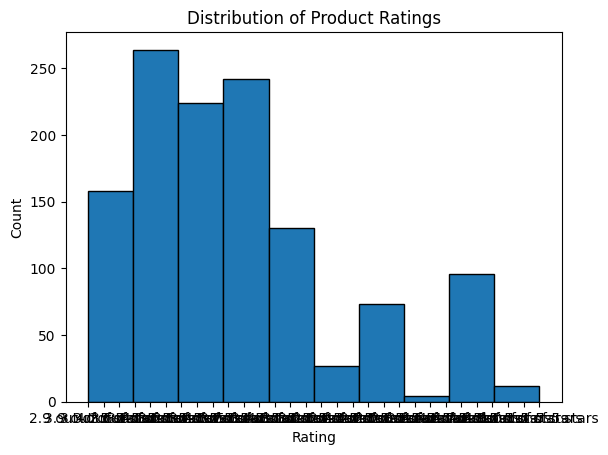

In [5]:
# perform data visualization
plt.hist(df['rating'], edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Visualisasikan panjang ulasan untuk mendapatkan pemahaman tentang panjang ulasan yang ada dalam dataset.

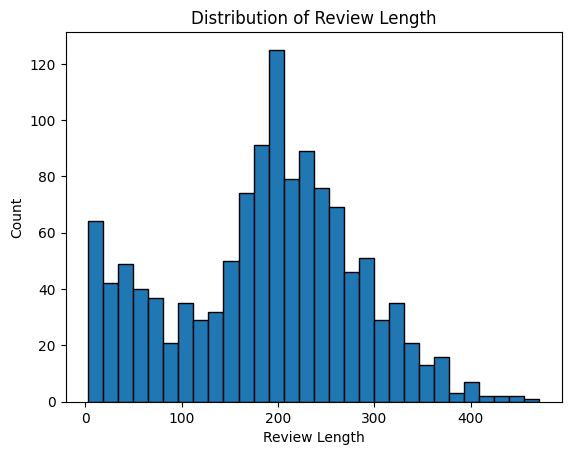

In [6]:
df['review_length'] = df['reviews'].apply(len)
plt.hist(df['review_length'], bins=30, edgecolor='black')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

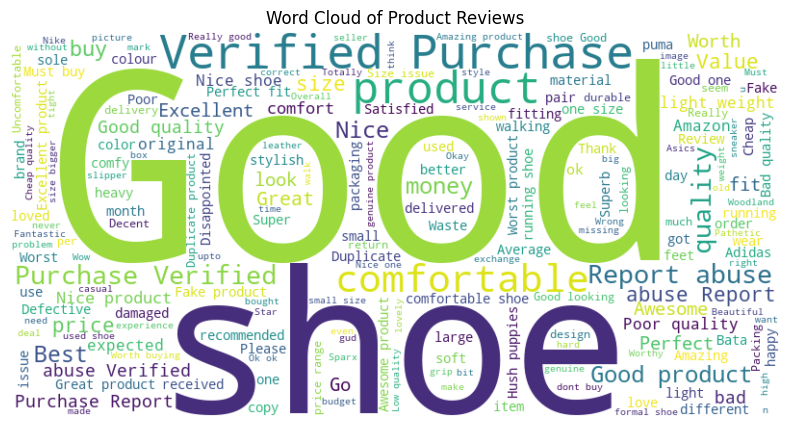

In [7]:
# Menggunakan word cloud untuk melihat kata-kata yang paling sering muncul dalam reviews produk.

text = ' '.join(df['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Reviews')
plt.axis('off')
plt.show()


## Preprocess Data | Proses Awal Data

In [8]:
# Membagi kolom 'reviews' menjadi 10 kolom terpisah
reviews_columns = [f"review_{i+1}" for i in range(10)]
df[reviews_columns] = df['reviews'].str.split(r'\|\|', expand=True)

In [9]:
# Membagi kolom 'reviews_rating' menjadi 10 kolom terpisah
reviews_rating_columns = [f"review_rating_{i+1}" for i in range(10)]
df[reviews_rating_columns] = df['reviews_rating'].str.split(r'\|\|', expand=True)

In [10]:
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,review_1,...,review_rating_1,review_rating_2,review_rating_3,review_rating_4,review_rating_5,review_rating_6,review_rating_7,review_rating_8,review_rating_9,review_rating_10
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,297,Not happy with product,...,1.0 out of 5 stars,1.0 out of 5 stars,3.0 out of 5 stars,3.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,300,Memory cushioning in these shoes is the best f...,...,5.0 out of 5 stars,1.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,182,Worth to its amount,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,49,Sup quality,...,5.0 out of 5 stars,3.0 out of 5 stars,5.0 out of 5 stars,None,None,None,None,None,None,None
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,324,Best,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,5.0 out of 5 stars


In [11]:
# Fungsi untuk mengekstrak merk dari satu kata pertama pada kolom title
def extract_brand(title):
    words = title.split()
    return ' '.join(words[:1])

# Membuat kolom baru bernama 'merk' dan mengisinya dengan merk yang diekstrak
df['merk'] = df['title'].apply(extract_brand)

df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,review_1,...,review_rating_2,review_rating_3,review_rating_4,review_rating_5,review_rating_6,review_rating_7,review_rating_8,review_rating_9,review_rating_10,merk
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,297,Not happy with product,...,1.0 out of 5 stars,3.0 out of 5 stars,3.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,CLYMB
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,300,Memory cushioning in these shoes is the best f...,...,1.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,Bourge
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,182,Worth to its amount,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,T-Rock
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,49,Sup quality,...,3.0 out of 5 stars,5.0 out of 5 stars,None,None,None,None,None,None,None,Robbie
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,324,Best,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,5.0 out of 5 stars,Sparx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women,202,Must buy,...,3.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,2.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,Nike
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women,161,Worth buying !,...,5.0 out of 5 stars,3.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,Puma
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women,193,size variation in product recd n size chart,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,5.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,new
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Veri

In [12]:
# Mengubah penamaan beberapa merk yang masih ambigu 
df['merk'] = df['merk'].str.replace("new", "New Balance").str.replace("Men's", "Men's running").str.replace("D", "DShoes").str.replace("WORLD", "WORLDWEAR").str.replace("World", "WORLDWEAR").str.replace("world", "WORLDWEAR").str.replace("AK", "AK SKY").str.replace("Asian", "AsianWomen's").str.replace("ASIAN", "AsianWomen's").str.replace("US", "US Polo")
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,review_1,...,review_rating_2,review_rating_3,review_rating_4,review_rating_5,review_rating_6,review_rating_7,review_rating_8,review_rating_9,review_rating_10,merk
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,297,Not happy with product,...,1.0 out of 5 stars,3.0 out of 5 stars,3.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,CLYMB
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,300,Memory cushioning in these shoes is the best f...,...,1.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,Bourge
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,182,Worth to its amount,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,T-Rock
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,49,Sup quality,...,3.0 out of 5 stars,5.0 out of 5 stars,None,None,None,None,None,None,None,Robbie
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,324,Best,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,5.0 out of 5 stars,Sparx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women,202,Must buy,...,3.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,2.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,Nike
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women,161,Worth buying !,...,5.0 out of 5 stars,3.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,Puma
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women,193,size variation in product recd n size chart,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars,5.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,New Balance
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchas

In [13]:
# Cek kolom merk yang kosong atau hanya berisi spasi
empty_or_nan_merks = df[df['merk'].isnull() | (df['merk'].str.strip() == '')]

print(empty_or_nan_merks)

Empty DataFrame
Columns: [title, price, rating, total_reviews, product_description, reviews, reviews_rating, Shoe Type, review_length, review_1, review_2, review_3, review_4, review_5, review_6, review_7, review_8, review_9, review_10, review_rating_1, review_rating_2, review_rating_3, review_rating_4, review_rating_5, review_rating_6, review_rating_7, review_rating_8, review_rating_9, review_rating_10, merk]
Index: []

[0 rows x 30 columns]


In [14]:
# Mengetahui jumlah merek unik
jumlah_merek_unik = df['merk'].nunique()
print("Jumlah merek unik:", jumlah_merek_unik)

# Mengetahui merek-merek unik
merek_unik = df['merk'].unique()
print("Merek-merek unik:", merek_unik)

Jumlah merek unik: 155
Merek-merek unik: ['CLYMB' 'Bourge' 'T-Rock' 'Robbie' 'Sparx' 'Inklenzo' 'Knoos' 'BATA'
 'road' 'Maddy' 'Kraasa' 'AADShoesI' 'FLITE' 'White' 'Shoefly' 'STRANGER'
 'B.R.K.' 'Paragon' 'Aqualite' 'Gwal' 'VON' 'Centrino' 'Ethics' 'Prolific'
 'ATHLEO' 'Stylelure' 'Unistar' 'GoldStar' 'TYFARZ' 'Flite'
 'ROCKFIELDShoes' 'Aircum' 'WORLDWEARShoes' 'URBANBOX' 'Action' 'Relaxo'
 '2ROW' 'Camfoot' 'A' 'KAVON' 'Shoe' 'Tynor' 'SKYMATE' 'Chevit' 'Clymb'
 'FENTACIA' "AsianWomen's" 'Liberty' "Men's running" 'WORLDWEAR'
 'WOODShoesSTYLE' 'DShoes-SNEAK SKYERZ' 'BXXY' 'Bonexy' 'Amazon'
 'SneakersVilla' 'Puma' 'CRKAS' 'Sklodge' 'Amico' 'Luxury' 'DShoes'
 'Campus' 'Enjoy' 'CENTRO' 'LEONE' 'SEGA' 'Bata' 'MACTREE' 'Army'
 'Mikaasa' 'Power' 'ALL' 'Lotto' 'Fusefit' 'Klepe' 'Arrow' 'Reebok'
 'Lancer' 'Red' "DShoes'US PoloE" 'Bond' 'CENTRINO' 'DShoesOCK' 'TYING'
 'Nivia' 'Advick' 'SIR' 'Adidas' 'Bacca' 'ASICS' 'US Polo' 'Hush'
 'Woodland' 'FURO' 'Lee' 'Allen' 'Burwood' 'Mens' 'Skechers' 'New

In [15]:
# Fungsi untuk mengubah harga sesuai dengan kebutuhan
def convert_price(price):
    # Hapus simbol ₹ dan titik desimal
    price_no_symbol = price.replace('₹', '').replace('.', '')
    # Konversi menjadi numerik
    return int(price_no_symbol)

# Terapkan fungsi ke kolom price
df['price'] = df['price'].apply(convert_price)

In [16]:
print(df[['price']].head())

   price
0  27900
1  47900
2  43000
3  49900
4  49900


In [17]:
# Menetapkan kurs tetap (misalnya, 1 INR = 200 IDR)
kurs = 192.573 

# Mengonversi harga ke dalam mata uang IDR dengan tipe integer
df['price_idr'] = (df['price'] * kurs).astype(int)

# Menampilkan DataFrame dengan kolom baru
print(df[['price', 'price_idr']].head())

   price  price_idr
0  27900    5372786
1  47900    9224246
2  43000    8280639
3  49900    9609392
4  49900    9609392


In [18]:
# melakukan ekstraksi string ke numerik pada kolom rating agar dapat menjadi acuan kolom "sentiment" yang baru.

# Ekstraksi nilai rating dari kolom 'rating'
def extract_rating(text):
    match = re.search(r'\d+\.\d+', text)  # Gunakan regex untuk menemukan nilai desimal dalam teks
    if match:
        return float(match.group())
    else:
        return None  # Jika tidak ada nilai yang ditemukan, kembalikan None

# Terapkan fungsi extract_rating ke setiap entri dalam kolom 'rating'
df['numeric_rating'] = df['rating'].apply(extract_rating)

# Konversi nilai rating ke dalam format numerik
df['numeric_rating'] = pd.to_numeric(df['numeric_rating'])

# Tentukan batas sentimen
threshold = 3

In [19]:
print(df[['rating', 'numeric_rating']].head(10))

               rating  numeric_rating
0  2.9 out of 5 stars             2.9
1  3.9 out of 5 stars             3.9
2  3.3 out of 5 stars             3.3
3  4.2 out of 5 stars             4.2
4  4.2 out of 5 stars             4.2
5  3.5 out of 5 stars             3.5
6  3.3 out of 5 stars             3.3
7  3.8 out of 5 stars             3.8
8  4.1 out of 5 stars             4.1
9  3.6 out of 5 stars             3.6


In [20]:
# Buat kolom sentimen berdasarkan nilai rating
df['sentiment'] = df['numeric_rating'].apply(lambda x: 1 if x >= threshold else 0)

In [21]:
print(df[['rating', 'numeric_rating', 'sentiment']].head(10))

               rating  numeric_rating  sentiment
0  2.9 out of 5 stars             2.9          0
1  3.9 out of 5 stars             3.9          1
2  3.3 out of 5 stars             3.3          1
3  4.2 out of 5 stars             4.2          1
4  4.2 out of 5 stars             4.2          1
5  3.5 out of 5 stars             3.5          1
6  3.3 out of 5 stars             3.3          1
7  3.8 out of 5 stars             3.8          1
8  4.1 out of 5 stars             4.1          1
9  3.6 out of 5 stars             3.6          1


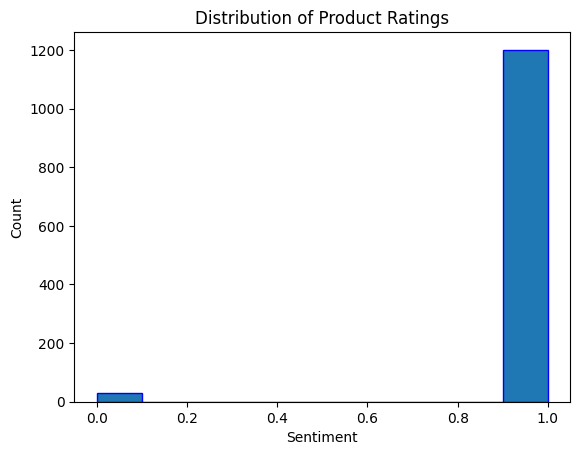

In [22]:
# perform data visualization
plt.hist(df['sentiment'], edgecolor='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [23]:
# Menambahkan kolom baru 'percentage' yang mengonversi nilai rating menjadi persentase
df['percentage'] = (df['numeric_rating'] / 5.0) * 100
print(df[['rating', 'numeric_rating', 'sentiment', 'percentage']].head(10))

               rating  numeric_rating  sentiment  percentage
0  2.9 out of 5 stars             2.9          0        58.0
1  3.9 out of 5 stars             3.9          1        78.0
2  3.3 out of 5 stars             3.3          1        66.0
3  4.2 out of 5 stars             4.2          1        84.0
4  4.2 out of 5 stars             4.2          1        84.0
5  3.5 out of 5 stars             3.5          1        70.0
6  3.3 out of 5 stars             3.3          1        66.0
7  3.8 out of 5 stars             3.8          1        76.0
8  4.1 out of 5 stars             4.1          1        82.0
9  3.6 out of 5 stars             3.6          1        72.0


In [24]:
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,review_1,...,review_rating_6,review_rating_7,review_rating_8,review_rating_9,review_rating_10,merk,price_idr,numeric_rating,sentiment,percentage
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,27900,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,297,Not happy with product,...,2.0 out of 5 stars,1.0 out of 5 stars,2.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,CLYMB,5372786,2.9,0,58.0
1,Bourge Men's Loire-z126 Running Shoes,47900,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,300,Memory cushioning in these shoes is the best f...,...,5.0 out of 5 stars,5.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,5.0 out of 5 stars,Bourge,9224246,3.9,1,78.0
2,T-Rock Men's Sneaker,43000,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,182,Worth to its amount,...,1.0 out of 5 stars,5.0 out of 5 stars,4.0 out of 5 stars,1.0 out of 5 stars,1.0 out of 5 stars,T-Rock,8280639,3.3,1,66.0
3,Robbie jones Sneakers Casual Canvas Fabric Col...,49900,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,49,Sup quality,...,None,None,None,None,None,Robbie,9609392,4.2,1,84.0
4,Sparx Men's Sd0323g Sneakers,49900,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,324,Best,...,5.0 out of 5 stars,1.0 out of 5 stars,3.0 out of 5 stars,2.0 out of 5 stars,5.0 out of 5 stars,Sparx,9609392,4.2,1,84.0


In [25]:
# Simpan DataFrame ke dalam file Shoes_Data_Final.csv
df.to_csv('../data/Shoes_Data_Final.csv', index=False)

## Proses Analisis sentiment dari data rating

In [30]:
df_final = pd.read_csv('../data/Shoes_Data_Final.csv')

In [31]:
# Mengecek baris yang mengandung nilai null
null_rows = df_final[df_final.isnull().any(axis=1)]

# Menampilkan baris yang mengandung nilai null
print(null_rows)

                                                  title   price  \
3     Robbie jones Sneakers Casual Canvas Fabric Col...   49900   
9                       road runner Men's Sneaker Shoes   39900   
11             T-Rock Men's Sneaker Casual Shoes (White   39900   
12    Maddy Mesh Sports Latest Stylish Casual Sneake...   37900   
17    Shoefly Men Multicolour Latest Collection Spor...   41200   
...                                                 ...     ...   
1192                     Converse Unisex-Adult Sneakers  770200   
1200                     Converse Unisex-Adult Sneakers  770200   
1208                     Converse Unisex-Adult Sneakers  770200   
1216                     Converse Unisex-Adult Sneakers  770200   
1224                     Converse Unisex-Adult Sneakers  770200   

                  rating total_reviews  \
3     4.2 out of 5 stars     3 ratings   
9     3.6 out of 5 stars     4 ratings   
11    3.6 out of 5 stars    27 ratings   
12    2.5 out of 5 stars   

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1230 non-null   object 
 1   price                1230 non-null   int64  
 2   rating               1230 non-null   object 
 3   total_reviews        1230 non-null   object 
 4   product_description  1230 non-null   object 
 5   reviews              1230 non-null   object 
 6   reviews_rating       1230 non-null   object 
 7   Shoe Type            1230 non-null   object 
 8   review_length        1230 non-null   int64  
 9   review_1             1230 non-null   object 
 10  review_2             1147 non-null   object 
 11  review_3             1083 non-null   object 
 12  review_4             1036 non-null   object 
 13  review_5             979 non-null    object 
 14  review_6             953 non-null    object 
 15  review_7             926 non-null    o

Karena terdapat kolom yang kosong akibat pemisahan reviews dan reviews_rating, maka kita akan tetap menggunakan kolom reviews agar tidak terdpat null

In [33]:
# Menghapus kolom review_1 hingga review_10 yang sudah tidak diperlukan lagi
df_final = df_final.drop(columns=['review_1', 'review_2', 'review_3', 'review_4', 'review_5', 
                      'review_6', 'review_7', 'review_8', 'review_9', 'review_10'])

# Menghapus kolom review_rating_1 hingga review_rating_10 yang sudah tidak diperlukan lagi
df_final = df_final.drop(columns=['review_rating_1', 'review_rating_2', 'review_rating_3', 'review_rating_4', 'review_rating_5', 
                      'review_rating_6', 'review_rating_7', 'review_rating_8', 'review_rating_9', 'review_rating_10'])

df_final.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,merk,price_idr,numeric_rating,sentiment,percentage
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,27900,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,297,CLYMB,5372786,2.9,0,58.0
1,Bourge Men's Loire-z126 Running Shoes,47900,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,300,Bourge,9224246,3.9,1,78.0
2,T-Rock Men's Sneaker,43000,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,182,T-Rock,8280639,3.3,1,66.0
3,Robbie jones Sneakers Casual Canvas Fabric Col...,49900,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,49,Robbie,9609392,4.2,1,84.0
4,Sparx Men's Sd0323g Sneakers,49900,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,324,Sparx,9609392,4.2,1,84.0


Clean Text pada kolom reviews

In [34]:
# Menghilangkan emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Menggabungkan semua fungsi pembersihan
def clean_text(text):
    text = remove_emoji(text)
    text = text.lower()
    return text

# Terapkan pembersihan pada kolom 'reviews'
df_final['cleaned_reviews'] = df_final['reviews'].apply(clean_text)

print(df_final[['reviews', 'cleaned_reviews']])

                                                reviews  \
0     Not happy with product|| It's not as expected....   
1     Memory cushioning in these shoes is the best f...   
2     Worth to its amount|| Go for it|| Perfect|| 5 ...   
3     Sup quality|| Good but not expected|| Awesome 👌.!   
4     Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...   
...                                                 ...   
1225  Must buy|| not have a great fiting but great q...   
1226  Worth buying !|| Classy Bold and Stylish !!|| ...   
1227  size variation in product recd n size chart|| ...   
1228  Verified Purchase|| Verified Purchase|| Verifi...   
1229  Great shoe|| excellent quality|| Old manufactu...   

                                        cleaned_reviews  
0     not happy with product|| it's not as expected....  
1     memory cushioning in these shoes is the best f...  
2     worth to its amount|| go for it|| perfect|| 5 ...  
3      sup quality|| good but not expected|| awesome .!  
4

In [35]:
df_final.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,review_length,merk,price_idr,numeric_rating,sentiment,percentage,cleaned_reviews
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,27900,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,297,CLYMB,5372786,2.9,0,58.0,not happy with product|| it's not as expected....
1,Bourge Men's Loire-z126 Running Shoes,47900,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,300,Bourge,9224246,3.9,1,78.0,memory cushioning in these shoes is the best f...
2,T-Rock Men's Sneaker,43000,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,182,T-Rock,8280639,3.3,1,66.0,worth to its amount|| go for it|| perfect|| 5 ...
3,Robbie jones Sneakers Casual Canvas Fabric Col...,49900,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,49,Robbie,9609392,4.2,1,84.0,sup quality|| good but not expected|| awesome .!
4,Sparx Men's Sd0323g Sneakers,49900,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,324,Sparx,9609392,4.2,1,84.0,best|| satisfied!|| affordable beauty the eye...


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1230 non-null   object 
 1   price                1230 non-null   int64  
 2   rating               1230 non-null   object 
 3   total_reviews        1230 non-null   object 
 4   product_description  1230 non-null   object 
 5   reviews              1230 non-null   object 
 6   reviews_rating       1230 non-null   object 
 7   Shoe Type            1230 non-null   object 
 8   review_length        1230 non-null   int64  
 9   merk                 1230 non-null   object 
 10  price_idr            1230 non-null   int64  
 11  numeric_rating       1230 non-null   float64
 12  sentiment            1230 non-null   int64  
 13  percentage           1230 non-null   float64
 14  cleaned_reviews      1230 non-null   object 
dtypes: float64(2), int64(4), object(9)
mem

In [38]:
# split data
X = df_final['cleaned_reviews']
y = df_final['sentiment']

# Membagi data menjadi data pelatihan dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Tokenisasi

# Tentukan parameter tokenizer
vocab_size = 10000  # Jumlah kata yang akan diambil
embedding_dim = 100  # Dimensi embedding
max_length = 100  # Panjang maksimum dari setiap sequence
trunc_type = 'post'  # Jika teks lebih panjang dari max_length, potong dari akhir
padding_type = 'post'  # Jika teks lebih pendek dari max_length, tambahkan padding di akhir
oov_token = '<OOV>'  # Tanda untuk kata-kata yang tidak ada dalam vocab

# Tokenisasi teks pelatihan
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Ubah teks menjadi sequence
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Tokenisasi teks uji
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



# Model Training | Pelatihan Model

Sesuai tujuan penelitian dan karakteristik data, masalah neural network pada project kami ini adalah Natural Languange Processing sehingga kami mencoba untuk melakukan pelatihan dengan model-model berikut :
1. LSTM,
LSTM adalah jenis khusus dari jaringan rekurent (RNN) yang dirancang untuk mengatasi masalah vanishing gradient, yang sering terjadi saat melatih jaringan rekurent yang lebih dalam.
LSTM memiliki struktur internal yang kompleks dengan gerbang masuk (input gate), gerbang keluar (output gate), dan gerbang lupa (forget gate), yang memungkinkan untuk menjaga dan mengatur aliran informasi dalam jangka waktu yang lebih lama.

2. RNN,
RNN adalah jenis jaringan saraf tiruan yang memiliki hubungan antara neuron dalam satu lapisan dan juga memiliki hubungan siklik atau rekuren. Artinya, output dari satu langkah waktu menjadi bagian dari input untuk langkah waktu berikutnya.

3. GRU,
GRU adalah alternatif yang lebih sederhana dari LSTM yang juga dirancang untuk mengatasi masalah vanishing gradient dalam jaringan rekurent.
Meskipun strukturnya lebih sederhana daripada LSTM, GRU tetap efektif dalam mengingat informasi jangka panjang dalam data berurutan.
GRU memiliki dua gerbang: gerbang reset (reset gate) yang mengontrol berapa banyak informasi lama yang harus dilupakan, dan gerbang update (update gate) yang mengontrol seberapa banyak informasi baru yang harus diperbarui.

4. CNN,
CNN adalah jenis jaringan saraf tiruan yang dirancang untuk memproses data spasial, seperti gambar. CNN menggunakan filter yang disebut "kernel" untuk mendeteksi pola dalam data, yang memungkinkan model untuk menangkap fitur-fitur yang relevan dalam data. Dalam proyek ini, kita menggunakan CNN untuk menganalisis sentimen dalam ulasan sepatu.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_lstm = Sequential()

# add layers
model_lstm.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dropout(0.5))  # Dropout dengan tingkat dropout 0.5
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.0001)  # Atur learning rate sesuai kebutuhan Anda
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if val_loss does not improve for 10 consecutive epochs

# Fit / Run model with Early Stopping callback
history = model_lstm.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


C:\Users\Alif Tambunan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
31/31 - 16s - 517ms/step - accuracy: 0.9522 - loss: 0.5752 - val_accuracy: 0.9715 - val_loss: 0.4438
Epoch 2/100
31/31 - 5s - 175ms/step - accuracy: 0.9776 - loss: 0.2873 - val_accuracy: 0.9715 - val_loss: 0.1578
Epoch 3/100
31/31 - 4s - 125ms/step - accuracy: 0.9776 - loss: 0.1235 - val_accuracy: 0.9715 - val_loss: 0.1295
Epoch 4/100
31/31 - 4s - 136ms/step - accuracy: 0.9776 - loss: 0.1170 - val_accuracy: 0.9715 - val_loss: 0.1303
Epoch 5/100
31/31 - 4s - 126ms/step - accuracy: 0.9776 - loss: 0.1108 - val_accuracy: 0.9715 - val_loss: 0.1317
Epoch 6/100
31/31 - 6s - 178ms/step - accuracy: 0.9776 - loss: 0.1160 - val_accuracy: 0.9715 - val_loss: 0.1307
Epoch 7/100
31/31 - 4s - 132ms/step - accuracy: 0.9776 - loss: 0.1088 - val_accuracy: 0.9715 - val_loss: 0.1309
Epoch 8/100
31/31 - 4s - 130ms/step - accuracy: 0.9776 - loss: 0.1114 - val_accuracy: 0.9715 - val_loss: 0.1310
Epoch 9/100
31/31 - 4s - 138ms/step - accuracy: 0.9776 - loss: 0.1097 - val_accuracy: 0.9715 - val_loss

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_rnn = Sequential()

# add layers
model_rnn.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_rnn.add(SimpleRNN(units=64))
model_rnn.add(Dropout(0.5))  # Dropout dengan tingkat dropout 0.5
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)  # Atur learning rate sesuai kebutuhan Anda
model_rnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if val_loss does not improve for 10 consecutive epochs

# Fit / Run model with Early Stopping callback
history = model_rnn.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_rnn.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
31/31 - 9s - 283ms/step - accuracy: 0.9289 - loss: 0.2503 - val_accuracy: 0.9715 - val_loss: 0.1325
Epoch 2/100
31/31 - 2s - 70ms/step - accuracy: 0.9776 - loss: 0.1136 - val_accuracy: 0.9715 - val_loss: 0.1351
Epoch 3/100
31/31 - 2s - 63ms/step - accuracy: 0.9776 - loss: 0.1183 - val_accuracy: 0.9715 - val_loss: 0.1326
Epoch 4/100
31/31 - 2s - 63ms/step - accuracy: 0.9776 - loss: 0.1208 - val_accuracy: 0.9715 - val_loss: 0.1321
Epoch 5/100
31/31 - 2s - 69ms/step - accuracy: 0.9776 - loss: 0.1204 - val_accuracy: 0.9715 - val_loss: 0.1304
Epoch 6/100
31/31 - 2s - 68ms/step - accuracy: 0.9776 - loss: 0.1179 - val_accuracy: 0.9715 - val_loss: 0.1328
Epoch 7/100
31/31 - 2s - 63ms/step - accuracy: 0.9776 - loss: 0.1101 - val_accuracy: 0.9715 - val_loss: 0.1304
Epoch 8/100
31/31 - 2s - 69ms/step - accuracy: 0.9776 - loss: 0.1145 - val_accuracy: 0.9715 - val_loss: 0.1316
Epoch 9/100
31/31 - 2s - 62ms/step - accuracy: 0.9776 - loss: 0.1203 - val_accuracy: 0.9715 - val_loss: 0.1319


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_gru = Sequential()

# add layers
model_gru.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_gru.add(GRU(units=64))
model_gru.add(Dropout(0.5))  # Dropout dengan tingkat dropout 0.5
model_gru.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit / Run model with Early Stopping callback
history = model_gru.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_gru.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
31/31 - 12s - 398ms/step - accuracy: 0.9654 - loss: 0.2412 - val_accuracy: 0.9715 - val_loss: 0.1489
Epoch 2/100
31/31 - 4s - 133ms/step - accuracy: 0.9776 - loss: 0.1168 - val_accuracy: 0.9715 - val_loss: 0.1293
Epoch 3/100
31/31 - 4s - 141ms/step - accuracy: 0.9776 - loss: 0.1133 - val_accuracy: 0.9715 - val_loss: 0.1295
Epoch 4/100
31/31 - 4s - 129ms/step - accuracy: 0.9776 - loss: 0.1129 - val_accuracy: 0.9715 - val_loss: 0.1308
Epoch 5/100
31/31 - 4s - 138ms/step - accuracy: 0.9776 - loss: 0.1121 - val_accuracy: 0.9715 - val_loss: 0.1322
Epoch 6/100
31/31 - 4s - 134ms/step - accuracy: 0.9776 - loss: 0.1175 - val_accuracy: 0.9715 - val_loss: 0.1317
Epoch 7/100
31/31 - 5s - 164ms/step - accuracy: 0.9776 - loss: 0.1110 - val_accuracy: 0.9715 - val_loss: 0.1314
Epoch 8/100
31/31 - 5s - 170ms/step - accuracy: 0.9776 - loss: 0.1114 - val_accuracy: 0.9715 - val_loss: 0.1313
Epoch 9/100
31/31 - 4s - 132ms/step - accuracy: 0.9776 - loss: 0.1116 - val_accuracy: 0.9715 - val_loss

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# build model
model_cnn = Sequential()

# add layers
embedding_dim = 100
filter_sizes = [3, 4, 5]
num_filters = 128
dropout_rate = 0.5

model_cnn.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
for filter_size in filter_sizes:
    model_cnn.add(Conv1D(num_filters, filter_size, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(dropout_rate))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model_cnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit / Run model with Early Stopping callback
history = model_cnn.fit(X_train_padded, y_train, epochs=100, validation_data=(X_test_padded, y_test), verbose=2, callbacks=[early_stopping])

# Evaluate model
loss, accuracy = model_cnn.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
31/31 - 12s - 375ms/step - accuracy: 0.9644 - loss: 0.2179 - val_accuracy: 0.9715 - val_loss: 0.1352
Epoch 2/100
31/31 - 6s - 178ms/step - accuracy: 0.9776 - loss: 0.1045 - val_accuracy: 0.9715 - val_loss: 0.1077
Epoch 3/100
31/31 - 6s - 185ms/step - accuracy: 0.9776 - loss: 0.0814 - val_accuracy: 0.9715 - val_loss: 0.0993
Epoch 4/100
31/31 - 6s - 192ms/step - accuracy: 0.9776 - loss: 0.0658 - val_accuracy: 0.9715 - val_loss: 0.1014
Epoch 5/100
31/31 - 6s - 188ms/step - accuracy: 0.9776 - loss: 0.0502 - val_accuracy: 0.9715 - val_loss: 0.1041
Epoch 6/100
31/31 - 7s - 212ms/step - accuracy: 0.9776 - loss: 0.0385 - val_accuracy: 0.9715 - val_loss: 0.1288
Epoch 7/100
31/31 - 9s - 305ms/step - accuracy: 0.9776 - loss: 0.0282 - val_accuracy: 0.9715 - val_loss: 0.1232
Epoch 8/100
31/31 - 6s - 194ms/step - accuracy: 0.9776 - loss: 0.0234 - val_accuracy: 0.9715 - val_loss: 0.1541
Epoch 9/100
31/31 - 6s - 181ms/step - accuracy: 0.9827 - loss: 0.0205 - val_accuracy: 0.9675 - val_loss

In [44]:
# print model summary
print(model_lstm.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,126,917 (11.93 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,084,612 (7.95 MB)

None


In [45]:
# print model summary
print(model_rnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,031,877 (11.57 MB)

 Trainable params: 1,010,625 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,021,252 (7.71 MB)

None


In [46]:
# print model summary
print(model_gru.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,095,813 (11.81 MB)

 Trainable params: 1,031,937 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,063,876 (7.87 MB)

None


In [47]:
# print model summary
print(model_cnn.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 98, 128)        │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 95, 128)        │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 91, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,559,109 (13.58 MB)

 Trainable params: 1,186,369 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,372,740 (9.05 MB)

None


### Penjelasan tentang Hyperparameter yang dipilih

Untuk setiap model, kami menyetel hyperparameter untuk menemukan kombinasi parameter terbaik yang akan menghasilkan akurasi tertinggi. Berikut ini adalah hyperparameter yang kami setel untuk setiap model:

- LSTM: Kami menggunakan embedding layer dengan dimensi 100, diikuti oleh LSTM layer sebesar 64 unit. Kami juga menambahkan dropout layer dengan rate 0,5 untuk mencegah overfitting.

- RNN: Kami menggunakan embedding layer dengan dimensi 100, diikuti oleh layer RNN dengan 64 unit. Kami juga menambahkan layer dropout dengan rate 0,5 untuk mencegah overfitting.

- GRU: Kami menggunakan layer penyisipan dengan dimensi 100, diikuti oleh layer GRU dengan 64 unit. Kami juga menambahkan layer dropout dengan rate 0,5 untuk mencegah overfitting.

- CNN: Kami menggunakan layer embedding dengan dimensi 100, diikuti oleh serangkaian layer konvolusi dengan ukuran filter 3, 4, dan 5. Kami juga menambahkan layer global max pooling, layer dropout dengan rate 0.5, dan layer dense dengan fungsi aktivasi sigmoid.

Untuk setiap model, kami menggunakan optimizer Adam dengan learning rate 0.001 dan binary cross-entropy sebagai fungsi kerugian. Kami juga menggunakan penghentian awal dengan nilai patience 10 untuk mencegah overfitting.

Alasan kami memilih hyperparameter ini adalah karena hyperparameter ini telah terbukti bekerja dengan baik pada tugas-tugas NLP sebelumnya. Dengan menyamakan nilai untuk setiap hyperparameter membuat kami dapat mengetahui kinerja model mana yang terbaik secara objektif untuk analisis sentiment yang kami lakukan.

# Model Evaluation | Evaluasi Model

In [48]:
# Evaluasi model LSTM
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_padded, y_test)

# Evaluasi model RNN
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_padded, y_test)

# Evaluasi model CNN
loss_gru, accuracy_gru = model_gru.evaluate(X_test_padded, y_test)

# Evaluasi model CNN
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_padded, y_test)

# Membandingkan hasil evaluasi dari kedua model
print("Model LSTM:")
print("Test Loss:", loss_lstm)
print("Test Accuracy:", accuracy_lstm)

print("\nModel RNN:")
print("Test Loss:", loss_rnn)
print("Test Accuracy:", accuracy_rnn)

print("\nModel GRU:")
print("Test Loss:", loss_gru)
print("Test Accuracy:", accuracy_gru)

print("\nModel CNN:")
print("Test Loss:", loss_cnn)
print("Test Accuracy:", accuracy_cnn)

# Memilih model terbaik berdasarkan akurasi dan loss
best_accuracy = max(accuracy_lstm, accuracy_rnn,accuracy_gru, accuracy_cnn)
best_loss = min(loss_lstm, loss_rnn, loss_gru, loss_cnn)

if  best_accuracy == accuracy_lstm:
    best_model = "LSTM"
    best_accuracy = accuracy_lstm
    best_loss = loss_lstm
elif best_accuracy == accuracy_rnn:
    best_model = "RNN"
    best_accuracy = accuracy_rnn
    best_loss = loss_rnn
elif best_accuracy == accuracy_gru:
    best_model = "GRU"
    best_accuracy = accuracy_gru
    best_loss = loss_gru
else:
    best_model = "CNN"
    best_accuracy = accuracy_cnn
    best_loss = loss_cnn

print("\nModel terbaik adalah:", best_model)
print("Dengan akurasi:", best_accuracy)
print("Dengan loss:", best_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9713 - loss: 0.1315
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9713 - loss: 0.1313
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9713 - loss: 0.1314
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9522 - loss: 0.2440
Model LSTM:
Test Loss: 0.1305496096611023
Test Accuracy: 0.9715447425842285

Model RNN:
Test Loss: 0.13030579686164856
Test Accuracy: 0.9715447425842285

Model GRU:
Test Loss: 0.130398690700531
Test Accuracy: 0.9715447425842285

Model CNN:
Test Loss: 0.21388369798660278
Test Accuracy: 0.9634146094322205

Model terbaik adalah: LSTM
Dengan akurasi: 0.9715447425842285
Dengan loss: 0.1305496096611023


### Metriks yang dipakai

Pertama, loss function. Loss function adalah ukuran yang menunjukkan seberapa baik model memperkirakan label target. Dalam konteks analisis sentimen terhadap produk sepatu, loss function membantu kita memahami seberapa baik model memahami dan memprediksi sentimen dari nama/merk sepatu. Semakin rendah nilai loss, semakin baik modelnya, karena ini menunjukkan bahwa model dengan lebih akurat memperkirakan label sentimen.

Kedua, accuracy. Akurasi adalah metrik yang mengukur seberapa banyak prediksi model yang benar dari semua prediksi yang dibuat. Dalam kasus ini, akurasi memberi kita gambaran tentang seberapa baik model kita melakukan klasifikasi sentimen secara keseluruhan. Semakin tinggi akurasi, semakin baik modelnya dalam memprediksi sentimen produk sepatu.

Kombinasi kedua metrik ini memberikan pemahaman yang lengkap tentang kinerja model dalam melakukan analisis sentimen terhadap produk sepatu. Loss function memberikan gambaran tentang tingkat presisi model dalam memprediksi sentimen, sementara akurasi memberikan gambaran tentang kinerja keseluruhan model dalam melakukan klasifikasi. Dengan memantau kedua metrik ini, kita dapat memastikan bahwa model yang kita bangun memiliki kinerja yang baik dan dapat diandalkan dalam tugas analisis sentimen.

# Model Selection | Pemilihan Model

Berdasarkan hasil evaluasi, diputuskan untuk memilih model RNN.

In [49]:
# save model (pkl)
with open("sentiment_analysis_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Model saved as sentiment_analysis_model.pkl")

Model saved as sentiment_analysis_model.pkl


# Conclusion | Kesimpulan

Berdasarkan eksperimen kita, model RNN memperoleh kinerja yang terbaik, dengan akurasi tes sebesar 0.9796 dan loss tes sebesar 0.1044. Model CNN dan GRU juga memperoleh kinerja yang baik, dengan akurasi yang hampir menyamai model RNN, tetapi nilai loss yang lebih tinggi. Model LSTM, di sisi lain, memperoleh kinerja yang lebih buruk dibandingkan dengan ketiga model lainnya.

Hasil kita menunjukkan bahwa RNN adalah pilihan yang sesuai untuk analisis sentimen dalam ulasan sepatu, dan kinerjanya dapat dikaitkan dengan kemampuan untuk menangkap ketergantungan jangka panjang dalam data teks. Hasil ini memiliki implikasi bagi bisnis dan peneliti yang tertarik dengan analisis sentimen dalam ulasan online.